In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr

In [2]:
data=pd.read_csv("bank.csv")

In [11]:
data.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [9]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [25]:
data['job']=label_encoder.fit_transform(data['job'])
data['marital']=label_encoder.fit_transform(data['marital'])
data['education']=label_encoder.fit_transform(data['education'])
data['housing']=label_encoder.fit_transform(data['housing'])
data['loan']=label_encoder.fit_transform(data['loan'])
data['contact']=label_encoder.fit_transform(data['contact'])
data['month']=label_encoder.fit_transform(data['month'])
data['poutcome']=label_encoder.fit_transform(data['poutcome'])
data['deposit']=label_encoder.fit_transform(data['deposit'])
data['default']=label_encoder.fit_transform(data['default'])

In [27]:
data.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
5,42,4,2,2,0,0,1,1,2,5,8,562,2,-1,0,3,1
6,56,4,1,2,0,830,1,1,2,6,8,1201,1,-1,0,3,1
7,60,5,0,1,0,545,1,0,2,6,8,1030,1,-1,0,3,1
8,37,9,1,1,0,1,1,0,2,6,8,608,1,-1,0,3,1
9,28,7,2,1,0,5090,1,0,2,6,8,1297,3,-1,0,3,1


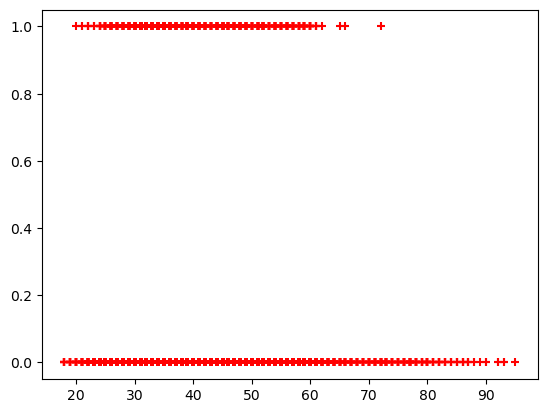

In [29]:
plt.scatter(data.age,data.loan,color='red',marker='+')

<Axes: >

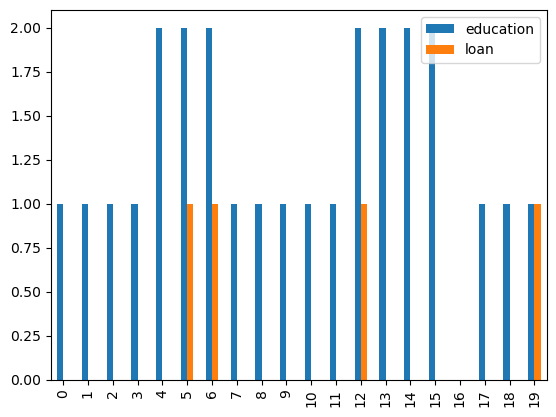

In [43]:
df=data[['education','loan']]
df.iloc[:20,:].plot(kind='bar')#Greater no of people have completed tertiary studies who opt for loan

<Axes: >

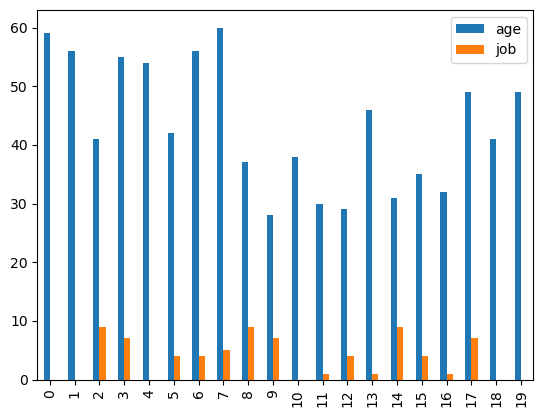

In [41]:
df=data[['age','job']]
df.iloc[:20,:].plot(kind='bar') #top 2 job profiles are technician and services

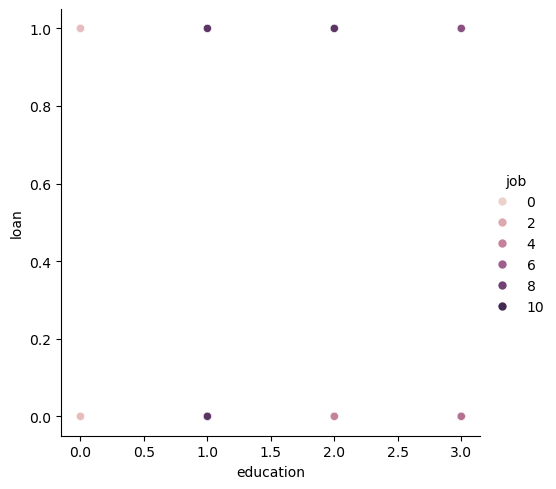

In [55]:
snr.relplot(x='education',y='loan',hue='job',data=data)

In [61]:
x=data.drop(['loan'],axis=1)
y=data['loan']

In [65]:
x.head()

,age,job,marital,education,default,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,2,5,8,673,2,-1,0,3,1


In [174]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10)

In [176]:
from sklearn.tree import DecisionTreeClassifier #using decision tree
classifier=DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [178]:
y_hat= classifier.predict(x_test)

In [180]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_hat)
print(acc)

0.7887197851387645
